In Spot, automata edges are labeled by Boolean functions over atomic propositions.
As a consequence, it is sometimes difficult to adapt algorithms that expect automata labeled by letters.   This notebook presents methods that can be used to split those edge labels to make it easier to consider them as letters.

In [10]:
import spot
from spot.jupyter import display_inline
spot.setup(show_default=".A")

Consider the labels appearing in the following automaton:

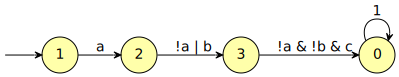

In [11]:
aut = spot.translate("a & X(a->b) & XX(!a&!b&c)")
aut

We try to use the word "edge" to refer to an edge of the automaton, labeled by a Boolean formula over AP.  These edges can be seen as representing several "transitions", each labeled by a valuation of all atomic propositions.  So the above automaton uses 4 edges to represent 19 transitions

In [12]:
s = spot.sub_stats_reachable(aut)
print(s.edges, s.transitions)

4 19


We can split the edges into the corresponding transitions using `split_edges()`.

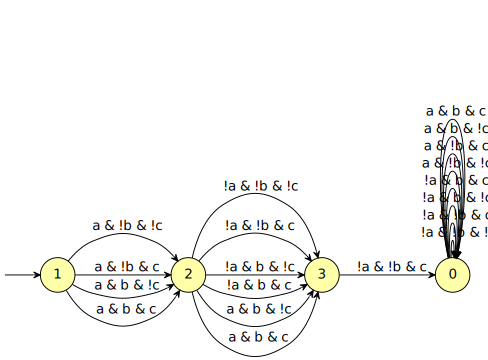

In [13]:
aut_split = spot.split_edges(aut)
aut_split

The opposite operation is `merge_edges()`, but it works in place:

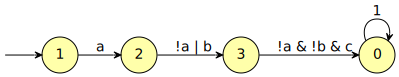

In [14]:
aut_split.merge_edges()
aut_split

Another way to split edges is `separate_edges()` this tweaks the labels so that any two labels can only be equal or disjoint.  Note how this creates fewer edges.

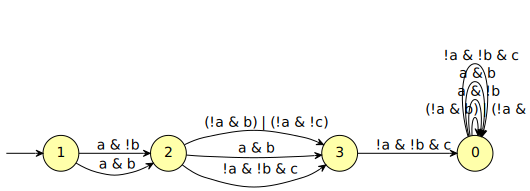

In [15]:
spot.separate_edges(aut)

A slightly lower-level interface is the `edge_separator` class.  This makes it possible to declare a "basis" (a set of labels) that will be used to separate the edge of an automaton.

`separate_edges()` is actually implemented as follows:

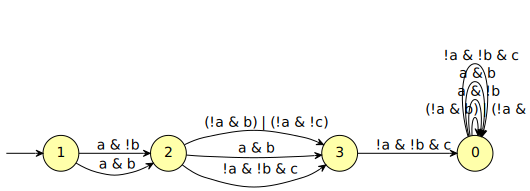

In [16]:
es = spot.edge_separator()
es.add_to_basis(aut)  # create a basis from the labels of aut
es.separate_implying(aut) # replace labels by all labels of the basis that imply them

The `edge_separator` can also be used to separate the edges of *another* automaton:

In [19]:
aut2 = spot.translate('a W Gd')
# replace labels based on "compatibility" with those from the basis
aut2sep = es.separate_compat(aut2)
display_inline(aut2, aut2sep)

Now, if we take any label A in `aut2sep` and any label B in `aut`, we necessarily 
have A∧B ∈ {A,0}.   I.e., either A implies B, or A and B are incompatible.  This is useful in certain algorithm that want to check that the inclusion of on automaton in another one, because they can arange to onlu check the inclusion (with `bdd_implies`) of the labels from the small automaton into the labels of the larger automaton.

We could also use `edge_separator` to create a combined basis for two automata:

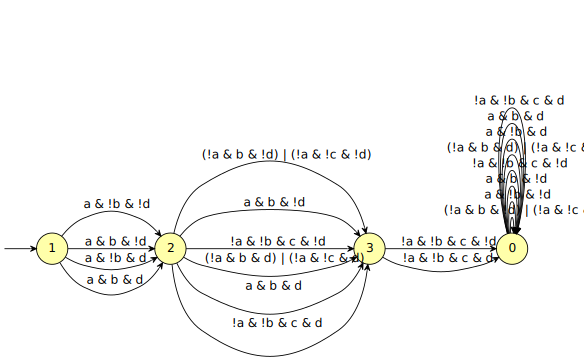

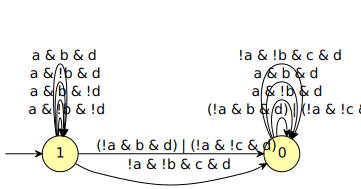

In [20]:
es2 = spot.edge_separator()
es2.add_to_basis(aut)
es2.add_to_basis(aut2)
display(es2.separate_implying(aut), es2.separate_implying(aut2))